In [30]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


In [31]:
def bytes_to_image(file_path, width=256):
    with open(file_path, 'r') as f:
        byte_values = []
        for line in f:
            parts = line.strip().split()[1:]  # skip memory address
            for b in parts:
                if b != '??':
                    try:
                        byte_values.append(int(b, 16))
                    except ValueError:
                        continue
    byte_array = np.array(byte_values, dtype=np.uint8)
    
    # Compute height and pad if needed
    height = int(np.ceil(len(byte_array) / width))
    padded = np.pad(byte_array, (0, height * width - len(byte_array)), mode='constant')
    img = padded.reshape((height, width))
    return img


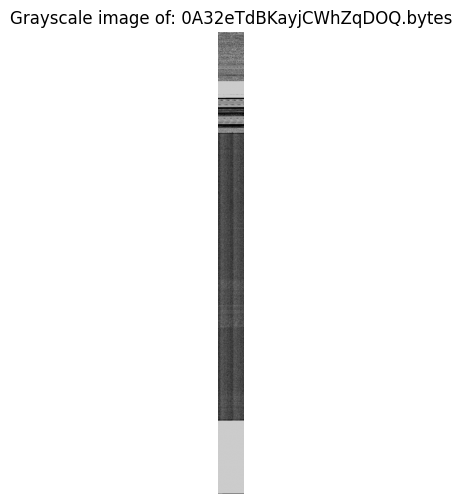

In [32]:
sample_file = next(f for f in os.listdir('.') if f.endswith('.bytes'))
sample_img = bytes_to_image(sample_file)

plt.figure(figsize=(6, 6))
plt.imshow(sample_img, cmap='gray')
plt.title(f"Grayscale image of: {sample_file}")
plt.axis('off')
plt.show()


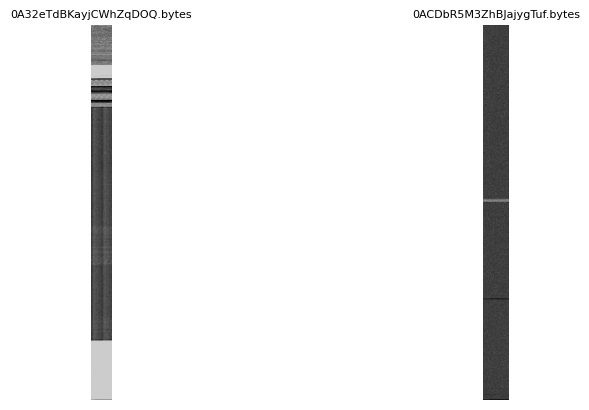

In [33]:
files = [f for f in os.listdir('.') if f.endswith('.bytes')][:9]  # take first 9 files

plt.figure(figsize=(12, 12))

for idx, fname in enumerate(files):
    try:
        img = bytes_to_image(fname)
        plt.subplot(3, 3, idx + 1)
        plt.imshow(img, cmap='gray')
        plt.title(fname, fontsize=8)
        plt.axis('off')
    except Exception as e:
        print(f"Error reading {fname}: {e}")

plt.tight_layout()
plt.show()
